### Data wrangling without loss

Inspect the “patients_lab_results_messy.csv” dataset

What is wrong with the dataset? Look for e.g. 
- Inconsistent labelling
- Inconsistent casing
- Missing values

Fix the issues without loosing any data! 

Discuss the reversibility of your steps and think about how you can make sure that you did not loose any data!


In [48]:
import pandas as pd

df = pd.read_csv("patients_results_messy.csv")
df

,Patient_ID,Visit Date,age,Gender,Blood Pressure (mmHg),Chol (mg_dl),glucose,Notes
0,P001,2021-01-03,34.0,Male,120/80,180.0,95,baseline
1,P002,2021/1/05,45.0,FEMALE,135/90,210.0,NaN,-
2,P003,03-01-2021,29.0,male,115/75,190.0,88,recheck
3,p004,2021.01.04,52.0,F,140/95,220.0,missing,new patient
4,P005,2021-01-06,33.0,M,118/78,185.0,89,repeat
5,P006,2021-01-06,33.0,M,118/78,185.0,89,repeat
6,P007,2021/01/07,NaN,Male,125/82,200.0,ninety,typo in glucose
7,P008,2021-01-08,46.0,Female,130/85,195.0,100,baseline
8,P009,2021-01-09,50.0,female,128/84,NaN,92,-
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97,follow-up


Clean up column names using string methods:

In [49]:
df.columns = df.columns.str.lower().str.replace('[^a-z0-9]+', '_', regex=True).str.strip('_')
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes
0,P001,2021-01-03,34.0,Male,120/80,180.0,95,baseline
1,P002,2021/1/05,45.0,FEMALE,135/90,210.0,NaN,-
2,P003,03-01-2021,29.0,male,115/75,190.0,88,recheck
3,p004,2021.01.04,52.0,F,140/95,220.0,missing,new patient
4,P005,2021-01-06,33.0,M,118/78,185.0,89,repeat
5,P006,2021-01-06,33.0,M,118/78,185.0,89,repeat
6,P007,2021/01/07,NaN,Male,125/82,200.0,ninety,typo in glucose
7,P008,2021-01-08,46.0,Female,130/85,195.0,100,baseline
8,P009,2021-01-09,50.0,female,128/84,NaN,92,-
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97,follow-up


In [50]:
df["glucose"]

0         95
1        NaN
2         88
3    missing
4         89
5         89
6     ninety
7        100
8         92
9         97
Name: glucose, dtype: object

In [51]:
df.glucose

0         95
1        NaN
2         88
3    missing
4         89
5         89
6     ninety
7        100
8         92
9         97
Name: glucose, dtype: object

Split blood pressure values into two columns, using the string method split():

In [52]:
df[['systolic', 'diastolic']] = df['blood_pressure_mmhg'].str.split('/', expand=True)

In [53]:
df.systolic = df.systolic.apply(pd.to_numeric)
df.diastolic = df.diastolic.apply(pd.to_numeric)
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic
0,P001,2021-01-03,34.0,Male,120/80,180.0,95,baseline,120,80
1,P002,2021/1/05,45.0,FEMALE,135/90,210.0,NaN,-,135,90
2,P003,03-01-2021,29.0,male,115/75,190.0,88,recheck,115,75
3,p004,2021.01.04,52.0,F,140/95,220.0,missing,new patient,140,95
4,P005,2021-01-06,33.0,M,118/78,185.0,89,repeat,118,78
5,P006,2021-01-06,33.0,M,118/78,185.0,89,repeat,118,78
6,P007,2021/01/07,NaN,Male,125/82,200.0,ninety,typo in glucose,125,82
7,P008,2021-01-08,46.0,Female,130/85,195.0,100,baseline,130,85
8,P009,2021-01-09,50.0,female,128/84,NaN,92,-,128,84
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97,follow-up,132,88


Convert glucose values:

In [54]:
df['glucose'] = pd.to_numeric(df['glucose'], errors="coerce") # avoids crashing if wrong types are parsed
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic
0,P001,2021-01-03,34.0,Male,120/80,180.0,95.0,baseline,120,80
1,P002,2021/1/05,45.0,FEMALE,135/90,210.0,NaN,-,135,90
2,P003,03-01-2021,29.0,male,115/75,190.0,88.0,recheck,115,75
3,p004,2021.01.04,52.0,F,140/95,220.0,NaN,new patient,140,95
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78
6,P007,2021/01/07,NaN,Male,125/82,200.0,NaN,typo in glucose,125,82
7,P008,2021-01-08,46.0,Female,130/85,195.0,100.0,baseline,130,85
8,P009,2021-01-09,50.0,female,128/84,NaN,92.0,-,128,84
9,P010,2021-01-10,41.0,MALE,132/88,210.0,97.0,follow-up,132,88


Standardize gender:

In [55]:
df['gender'] = df['gender'].str.upper().map({'MALE': 'M', 'FEMALE': 'F', 'M': 'M', 'F': 'F'})
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80
1,P002,2021/1/05,45.0,F,135/90,210.0,NaN,-,135,90
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75
3,p004,2021.01.04,52.0,F,140/95,220.0,NaN,new patient,140,95
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78
6,P007,2021/01/07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88


Parse dates to standard format:

In [56]:
# standardize visit_date
df['visit_date'] = (
    df['visit_date']
    .str.replace(r'[./]', '-', regex=True)  # unify separators
    .str.strip()
)

df['visit_date_clean'] = pd.to_datetime(df['visit_date'], errors='coerce')
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT
3,p004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
6,P007,2021-01-07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82,2021-01-07
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84,2021-01-09
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10


Fill or flag missing data (no deletions) in some of the columns:

Further cleanup: patient_id!

In [57]:
df.patient_id = df.patient_id.str.upper()
df

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
5,P006,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06
6,P007,2021-01-07,NaN,M,125/82,200.0,NaN,typo in glucose,125,82,2021-01-07
7,P008,2021-01-08,46.0,F,130/85,195.0,100.0,baseline,130,85,2021-01-08
8,P009,2021-01-09,50.0,F,128/84,NaN,92.0,-,128,84,2021-01-09
9,P010,2021-01-10,41.0,M,132/88,210.0,97.0,follow-up,132,88,2021-01-10


Convert type in systolic and diastolic pressure columns (pd.to_numeric)

### Add the extended patient list and the patients info.

In [58]:
df_extension = pd.read_csv("patient_list_extended.csv")
df_2merge = pd.read_csv("patients_info.csv")

In [59]:
df_extended = pd.concat([df,df_extension], ignore_index=True)
#df_extended

In [60]:
df_complete = pd.merge(df_extended, df_2merge, on="patient_id", how="outer")
df_complete.head()

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean,bmi,smoker
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03,24.5,No
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05,27.2,Yes
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT,25.0,No
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04,31.0,Yes
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,26.4,No


In [61]:
df_complete2 = df_extended.join(df_2merge.set_index("patient_id"), on="patient_id", how="outer")
df_complete2.head()

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean,bmi,smoker
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03,24.5,No
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05,27.2,Yes
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT,25.0,No
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04,31.0,Yes
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,26.4,No


In [62]:
print(df.shape)
print(df_extension.shape)
print(df_extended.shape)
print(df_2merge.shape)
print(df_complete.shape)
print(df_complete2.shape)

(10, 11)
(42, 10)
(52, 11)
(38, 3)
(56, 13)
(56, 13)


In [63]:
df_complete.to_csv("patients_list_complete.csv",index=False)

In [64]:
df_complete.isna().sum()

patient_id              0
visit_date              0
age                     9
gender                  0
blood_pressure_mmhg     0
chol_mg_dl              7
glucose                15
notes                  21
systolic                0
diastolic               0
visit_date_clean       47
bmi                    18
smoker                 24
dtype: int64

In [65]:
df_complete["is_age_missing"] = df_complete.age.isna()

In [66]:
df_complete.head()

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean,bmi,smoker,is_age_missing
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03,24.5,No,False
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05,27.2,Yes,False
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT,25.0,No,False
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04,31.0,Yes,False
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06,26.4,No,False


In [67]:
df_dropna_smokers = df_complete.dropna(subset="smoker")


<Axes: xlabel='chol_mg_dl', ylabel='Count'>

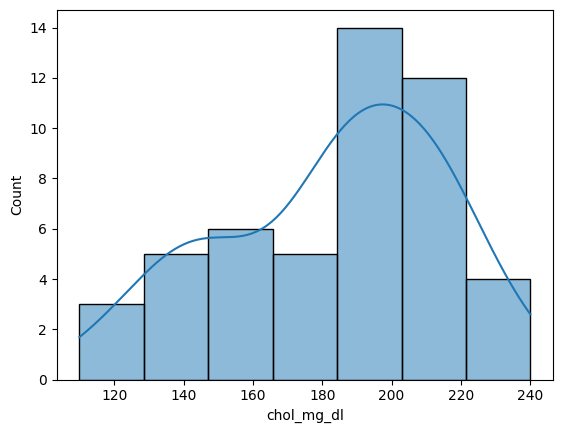

In [68]:
import seaborn as sns

sns.histplot(df_complete["chol_mg_dl"], kde=True)

<Axes: xlabel='chol_mg_dl', ylabel='Count'>

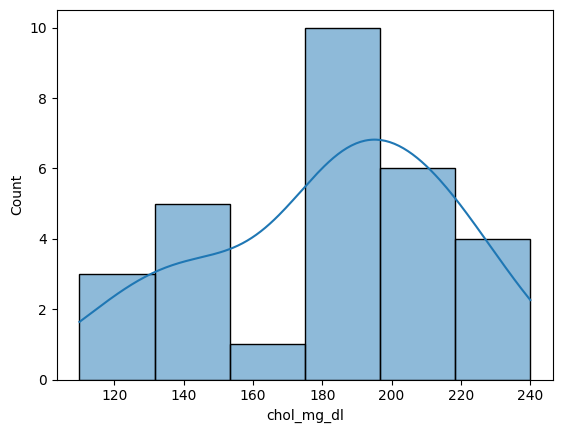

In [69]:
sns.histplot(df_dropna_smokers["chol_mg_dl"], kde=True)

In [76]:
df_complete.duplicated().sum()
new_df = df_complete.drop_duplicates(subset=["age","chol_mg_dl"])


In [77]:
df.head()

,patient_id,visit_date,age,gender,blood_pressure_mmhg,chol_mg_dl,glucose,notes,systolic,diastolic,visit_date_clean
0,P001,2021-01-03,34.0,M,120/80,180.0,95.0,baseline,120,80,2021-01-03
1,P002,2021-1-05,45.0,F,135/90,210.0,NaN,-,135,90,2021-01-05
2,P003,03-01-2021,29.0,M,115/75,190.0,88.0,recheck,115,75,NaT
3,P004,2021-01-04,52.0,F,140/95,220.0,NaN,new patient,140,95,2021-01-04
4,P005,2021-01-06,33.0,M,118/78,185.0,89.0,repeat,118,78,2021-01-06


### Outlier filtering

In [89]:
# IQR
Q1 = df.chol_mg_dl.quantile(0.25)
Q3 = df.chol_mg_dl.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(Q1, Q3)

185.0 210.0


In [90]:
filtered_df = df[(df.chol_mg_dl >= lower) & (df.chol_mg_dl <= upper)]
filtered_df.size

99

In [97]:
# clip
lower = df.chol_mg_dl.quantile(.02)
upper = df.chol_mg_dl.quantile(.98)

clipped_df = df.chol_mg_dl.clip(lower, upper)
clipped_df.head(15)


0    180.8
1    210.0
2    190.0
3    218.4
4    185.0
5    185.0
6    200.0
7    195.0
8      NaN
9    210.0
Name: chol_mg_dl, dtype: float64

In [99]:
from scipy import stats

# z-score is the meausre for how far away the datapoints are away from the mean, measures in stdev
# > 3*stdev is considered an outlier
filtered_df2 = df[abs(stats.zscore(df.chol_mg_dl.notna())) < 3] # zscore fails if NaNs are not removed
filtered_df2.size

99